In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gp
import pandas as pd
import Genmod_Utilities as gu
import gdal

C:\Users\jjstarn\AppData\Local\Continuum\miniconda3\envs\tenflo\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
model_ws = '.\Assabet'
os.getcwd()

'W:\\GenModCal3\\GIS_test'

.\Assabet\ned.tif


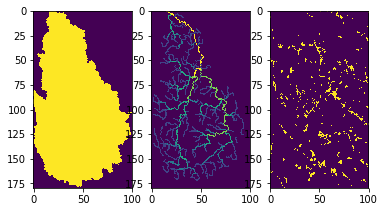

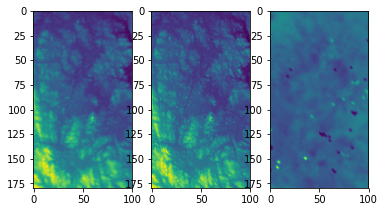

In [3]:
src = os.path.join(model_ws, 'ned.tif')
print(src)
ned_ras = gu.SourceProcessing()
ned_ras.read_raster(src)
prj = ned_ras.output_raster_prj
prj

theta = -0.47801613305437707
LX = LY = 304.8006096012192
nrow, ncol = 180, 100
origin = [1986043.37903465, 2445686.15016691]

ras = gu.SourceProcessing()
ras.create_model_grid(theta, origin, LX, LY, nrow, ncol, prj)

src = os.path.join(model_ws, 'domain_outline.shp')
ras.process_vector_data(src, 'ibound')
ibound = ras.new_array
dest = os.path.join(model_ws, 'tibound.tif')
ras.write_raster(dest)

src = os.path.join(model_ws, 'NHD_clip.shp')
ras.process_vector_data(src, 'StreamOrde')
stream = ras.new_array
dest = os.path.join(model_ws, 'tstream_order.tif')
ras.write_raster(dest)

src = os.path.join(model_ws, 'lakes.shp')
ras.process_vector_data(src, 'is_lake')
lakes = ras.new_array
dest = os.path.join(model_ws, 'tlake.tif')
ras.write_raster(dest)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(ibound)
ax[1].imshow(stream)
ax[2].imshow(lakes)

src = os.path.join(model_ws, 'ned.tif')
ras.process_raster_data(src, gdal.GRA_Bilinear, 0.01)
ned = ras.new_array
dest = os.path.join(model_ws, 'tned.tif')
ras.write_raster(dest)

src = os.path.join(model_ws, 'ned_mean.tif')
ras.process_raster_data(src, gdal.GRA_Average, 0.01)
ned_mean = ras.new_array
dest = os.path.join(model_ws, 'tned_mean.tif')
ras.write_raster(dest)

src = os.path.join(model_ws, 'rch_eff_m_Reitz_2013.tif') 
ras.process_raster_data(src, gdal.GRA_Bilinear, 1.0)
rch_eff_m_Reitz_2013 = ras.new_array
dest = os.path.join(model_ws, 'trch_eff_m_Reitz_2013.tif')
ras.write_raster(dest)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(ned)
ax[1].imshow(ned_mean)
ax[2].imshow(rch_eff_m_Reitz_2013)

